<a href="https://colab.research.google.com/github/semthedev/data-analytics-projects/blob/main/%D0%9E%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B8_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store

На данных google play store предлагается проверить какие факторы влияют на рейтинг приложений

Цель анализа - проверить следующие гипотизы:


1.   Бесплатные приложения имеют более низкий средний рейтинг по сравнению с платными.
2.   Приложения с большим количеством установок имеют более высокий средний рейтинг.
3.   Приложения в определенных категориях имеют более высокий рейтинг, чем приложения в других категориях.
4.   Приложения меньшего размера имеют больше установок, так как занимают меньше места на устройстве.

# Обзор данных

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Аналитика данных /Проекты Аналитик данных/googleplaystore.csv')

In [73]:
# получение первых 10 строк таблицы df
print(df.head(10))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1

In [74]:
# вывод на экран общей информации о таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Итак, в таблице 13 столбцов. Тип данных во всех столбцах — object.

Согласно документации к данным:

App — название приложения;

Category — категория приложения;

Rating — рейтинг приложения;

Reviews — количество отзывов;

Size — размер приложения;

Installs — количество установок;

Type — тип приложения (бесплатное или платное);

Price - цена приложения;

Content Rating - возрастной рейтинг;

Genres - жанры приложения;

Last Updated - дата последнего обновления;

Current Ver - текущая версия приложения;

Android Ver -минимальная версия Android.

В названиях колонок видны три нарушения стиля:

Строчные буквы сочетаются с прописными.
Встречаются пробелы.
Названия, состоящие из двух и более слов написаны не в змеином_регистре.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

# Предобработка данных

### Стили заголовок

In [75]:
# вывод на экран названий всех столбцов таблицы df
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [76]:
# переименование некоторых столбцов
df = df.rename(columns={'App' : 'app', 'Category' : 'category', 'Rating' : 'rating', 'Reviews' : 'reviews', 'Size' : 'size', 'Installs' : 'installs', 'Type' : 'type', 'Price' : 'price', 'Content Rating' : 'content_rating', 'Genres' : 'genres', 'Last Updated' : 'last_updated', 'Current Ver' : 'current_ver', 'Android Ver' : 'android_ver'})

In [77]:
# вывод на экран новых названий всех столбцов таблицы df
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

### Пустые строки на unknown

In [78]:
# сумма всех пропусков в таблице
df.isna().sum() / df.shape[0] * 100

,0
app,0.000000
category,0.000000
rating,13.596532
reviews,0.000000
size,0.000000
installs,0.000000
type,0.009224
price,0.000000
content_rating,0.009224
genres,0.000000


В строке **rating** мы получили значение **13.596532**, **type** **0.009224**,

**content_rating	0.009224**,

**current_ver	0.073794**,

**android_ver	0.027673**

В дальнейшем будем смотреть какие значения содержат эти строки чтобы корректно заменить пустые строки в **'unknown'**



In [83]:
# Проверка значений, которые были засчитаны как пропуски в столбце 'rating'
print("Уникальные значения в столбце 'rating' (отсортированы по убыванию):")
sorted_values = df['rating'].value_counts(dropna=False).sort_index(ascending=False)  # Сортировка по убыванию
print(sorted_values)

# Подсчет количества строк с NaN в 'rating'
missing_rating_count = df['rating'].isna().sum()
print(f"\nКоличество строк с NaN в столбце 'rating': {missing_rating_count}")

Уникальные значения в столбце 'rating' (отсортированы по убыванию):
rating
19.0       1
5.0      274
4.9       87
4.8      234
4.7      499
4.6      823
4.5     1038
4.4     1109
4.3     1076
4.2      952
4.1      708
4.0      568
3.9      386
3.8      303
3.7      239
3.6      174
3.5      163
3.4      128
3.3      102
3.2       64
3.1       69
3.0       83
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.4       19
2.3       20
2.2       14
2.1        8
2.0       12
1.9       13
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
1.0       16
NaN     1474
Name: count, dtype: int64

Количество строк с NaN в столбце 'rating': 1474


Как мы можем заметить пустых строк в строке **rating** 1474. Кроме этого есть 1 значение с рейтингом 19.0 это тоже будет считатся как пустая строка.

In [95]:
# Замена пропущенных значений в столбце 'rating' на 'unknown'
df['rating'] = df['rating'].fillna('unknown')

# Проверка результатов
print(df['rating'].value_counts(dropna=False))

rating
unknown    1475
4.4        1109
4.3        1076
4.5        1038
4.2         952
4.6         823
4.1         708
4.0         568
4.7         499
3.9         386
3.8         303
5.0         274
3.7         239
4.8         234
3.6         174
3.5         163
3.4         128
3.3         102
4.9          87
3.0          83
3.1          69
3.2          64
2.9          45
2.8          42
2.7          25
2.6          25
2.5          21
2.3          20
2.4          19
1.0          16
2.2          14
1.9          13
2.0          12
1.7           8
1.8           8
2.1           8
1.6           4
1.4           3
1.5           3
1.2           1
Name: count, dtype: int64


Дальше проверяем значения строки **type** чтобы посмотреть какие значения нужно заменить на **unknown**

In [101]:
# Проверка значений, которые были засчитаны как пропуски в столбце 'type'
print("Уникальные значения в столбце 'type':")
print(df['type'].value_counts(dropna=False))  # Вывод всех значений, включая NaN

# Подсчет количества строк с NaN в 'type'
missing_type_count = df['type'].isna().sum()

Уникальные значения в столбце 'type':
type
Free       10039
Paid         800
unknown        1
0              1
Name: count, dtype: int64


Заменим значения NaN и 0 на unknown

In [105]:
# Убедимся, что заменяем 0 как число и как строку
df['type'] = df['type'].replace([0, '0'], 'unknown')  # Заменяем как числовое, так и строковое значение 0
df['type'] = df['type'].fillna('unknown')  # Заменяем NaN на 'unknown'

# Проверяем результаты
print("Уникальные значения в столбце 'type':")
print(df['type'].value_counts(dropna=False))  # Вывод всех уникальных значений с их количеством

Уникальные значения в столбце 'type':
type
Free       10039
Paid         800
unknown        2
Name: count, dtype: int64


Проверяем значения строки **content_rating**

In [106]:
# Проверка значений, которые были засчитаны как пропуски в столбце 'content_rating'
print("Уникальные значения в столбце 'content_rating':")
print(df['content_rating'].value_counts(dropna=False))  # Вывод всех значений, включая NaN

# Подсчет количества строк с NaN в 'content_rating'
missing_content_rating_count = df['content_rating'].isna().sum()
print(f"\nКоличество строк с NaN в столбце 'content_rating': {missing_content_rating_count}")


Уникальные значения в столбце 'content_rating':
content_rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
NaN                   1
Name: count, dtype: int64

Количество строк с NaN в столбце 'content_rating': 1


Заменим значения Unrated и NaN на **unknown**

In [107]:
# Заменяем значения 'Unrated' и NaN на 'unknown' в столбце 'content_rating'
df['content_rating'] = df['content_rating'].replace('Unrated', 'unknown')  # Заменяем 'Unrated' на 'unknown'
df['content_rating'] = df['content_rating'].fillna('unknown')  # Заменяем NaN на 'unknown'

# Проверяем результаты
print("Уникальные значения в столбце 'content_rating':")
print(df['content_rating'].value_counts(dropna=False))  # Вывод всех уникальных значений с их количеством

Уникальные значения в столбце 'content_rating':
content_rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
unknown               3
Name: count, dtype: int64


Проверяем значения строки **current_ver**

In [108]:
# Проверка значений, которые были засчитаны как пропуски в столбце 'current_ver'
print("Уникальные значения в столбце 'current_ver':")
print(df['current_ver'].value_counts(dropna=False))  # Вывод всех значений, включая NaN

# Подсчет количества строк с NaN в 'current_ver'
missing_current_ver_count = df['current_ver'].isna().sum()
print(f"\nКоличество строк с NaN в столбце 'current_ver': {missing_current_ver_count}")


Уникальные значения в столбце 'current_ver':
current_ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2833, dtype: int64

Количество строк с NaN в столбце 'current_ver': 8


In [109]:
# Заменяем значения NaN на 'unknown' в столбце 'current_ver'
df['current_ver'] = df['current_ver'].fillna('unknown')

# Проверяем результаты
print("Уникальные значения в столбце 'current_ver':")
print(df['current_ver'].value_counts(dropna=False))  # Вывод всех уникальных значений с их количеством

Уникальные значения в столбце 'current_ver':
current_ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2833, dtype: int64


Проверяем значения строки **android_ver**

In [110]:
# Проверка значений, которые были засчитаны как пропуски в столбце 'android_ver'
print("Уникальные значения в столбце 'android_ver':")
print(df['android_ver'].value_counts(dropna=False))  # Вывод всех значений, включая NaN

# Подсчет количества строк с NaN в 'android_ver'
missing_android_ver_count = df['android_ver'].isna().sum()
print(f"\nКоличество строк с NaN в столбце 'android_ver': {missing_android_ver_count}")

Уникальные значения в столбце 'android_ver':
android_ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
NaN                      3
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [111]:
# Заменяем значения NaN на 'unknown' в столбце 'android_ver'
df['android_ver'] = df['android_ver'].fillna('unknown')

# Проверяем результаты
print("Уникальные значения в столбце 'android_ver':")
print(df['android_ver'].value_counts(dropna=False))  # Вывод всех уникальных значений с их количеством


Уникальные значения в столбце 'android_ver':
android_ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
unknown                  3
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [113]:
# сумма всех пропусков в таблице
df.isna().sum() / df.shape[0] * 100

,0
app,0.0
category,0.0
rating,0.0
reviews,0.0
size,0.0
installs,0.0
type,0.0
price,0.0
content_rating,0.0
genres,0.0


In [114]:
# получение первых 10 строк таблицы df
print(df.head(10))

                                                 app        category rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                                Coloring book moana  ART_AND_DESIGN    3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN    4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    4.3   
5                         Paper flowers instructions  ART_AND_DESIGN    4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN    3.8   
7                                   Infinite Painter  ART_AND_DESIGN    4.1   
8                               Garden Coloring Book  ART_AND_DESIGN    4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN    4.7   

  reviews  size     installs  type price content_rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   

### Дубликаты

Явные дубликаты

In [115]:
# подсчёт дубликатов
df.duplicated().sum()

483

In [116]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [117]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [118]:
# Проверка уникальных значений во всех строковых столбцах
string_columns = df.select_dtypes(include=['object']).columns

# Просмотр уникальных названий жанров

for col in string_columns:
    unique_values = df[col].dropna().unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")


Unique values in column 'app':
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


Unique values in column 'category':
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


Unique values in column 'rating':
[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.0 'unknown' 4.8 4.9 3.6 3.7 3.3
 3.4 3.5 3.1 5.0 2.6 3.0 1.9 2.5 2.8 2.7 1.0 2.9 2.3 2.2 1.7 2.0 1.8 2.4
 1.6 2.1 1.4 1.5 1.2]


Unique values

**Выводы:**

Предобработка обнаружила такие проблемы в данных:
1.   нарушения в стиле заголовков,
2.   пропущенные значения,
3.   дубликаты

Теперь датасет очищен от пропусков и некорректных значений, что делает его готовым для проверки гипотез.

# Проверка гипотез

### Бесплатные приложения имеют более низкий средний рейтинг по сравнению с платными.


Первая гипотех утверждает что средний рейтинг бесплатных и платных приложений отличаются. Для того чтобы проверить насколько они отличаются
1.   Расчитаем средний рейтинг
2.   Построим столбчатую диаграмму для наглядного сравнения среднего рейтинга.



In [122]:
# Убираем строки, где 'rating' или 'type' имеют значение 'unknown'
df_clean = df[(df['rating'] != 'unknown') & (df['type'] != 'unknown')]

# Группируем по 'type' и рассчитываем средний рейтинг
rating_by_type = df_clean.groupby('type')['rating'].mean()

# Выводим результат
print("Средний рейтинг по типу приложения:")
print(rating_by_type)

Средний рейтинг по типу приложения:
type
Free    4.182425
Paid    4.261501
Name: rating, dtype: object


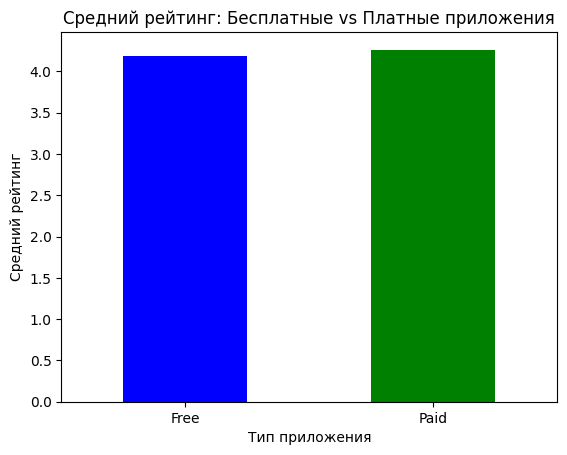

In [124]:
import matplotlib.pyplot as plt
# Визуализация для сравнения
rating_by_type.plot(kind='bar', title='Средний рейтинг: Бесплатные vs Платные приложения', ylabel='Средний рейтинг', xlabel='Тип приложения', color=['blue', 'green'])
plt.xticks(rotation=0)
plt.show()

**Выводы:**
Средний рейтинг платных приложений (**4.26**) немного выше, чем у бесплатных приложений (**4.18**).

Это подтверждает гипотезу о том, что платные приложения, как правило, имеют более высокий средний рейтинг по сравнению с бесплатными. Однако разница незначительная, что может указывать на высокое качество большинства приложений в обеих категориях.


### Приложения с большим количеством установок имеют более высокий средний рейтинг.

In [128]:
# Убираем строки, где 'type' или 'rating' равны 'unknown'
df_clean_installs = df[(df['type'] != 'unknown') & (df['rating'] != 'unknown')]

# Группируем данные по количеству установок и рассчитываем средний рейтинг
installs_rating = df_clean_installs.groupby('installs')['rating'].mean().reset_index()
# Вывод результата группировки по количеству установок и среднего рейтинга
print("Средний рейтинг по количеству установок:")
print(installs_rating)


Средний рейтинг по количеству установок:
          installs    rating
0               1+       5.0
1           1,000+   4.06404
2       1,000,000+  4.218775
3   1,000,000,000+  4.261224
4              10+  4.624638
5          10,000+  4.035996
6      10,000,000+  4.313604
7             100+  4.363696
8         100,000+  4.113063
9     100,000,000+  4.408401
10              5+  4.611111
11          5,000+  4.019718
12      5,000,000+  4.239385
13             50+  4.419643
14         50,000+  4.050216
15     50,000,000+  4.348529
16            500+  4.177889
17        500,000+  4.173256
18    500,000,000+  4.347541
